## Creating An End To End SMS Spam classifier

In [2]:
## Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Loading the DataSet


df = pd.read_csv('spam.csv', encoding='ISO-8859-1')


In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


# Project Workflow

1. **Data Cleaning**  
2. **Exploratory Data Analysis**  
3. **Text Preprocessing**  
4. **Model Building**  
5. **Evaluation**  
6. **Improvement**  
7. **Website Development**  
8. **Deployment**  


## Step1 #Data Cleaning

In [7]:
## First We check the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
## As We see our last 3 columns have mostly null values so we remove these columns
df.columns = df.columns.str.strip()  # Removes leading & trailing spaces
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)




In [9]:
df.shape

(5572, 2)

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
## Rename the columns
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)


In [12]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
## We convert target column into numerical then we use label encoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [14]:
df['Target']=encoder.fit_transform(df['Target'])

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])

# To see mapping
dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))


{np.int64(0): np.int64(0), np.int64(1): np.int64(1)}

In [16]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
## Checking the missig values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [18]:
## Checking the duplicates
df.duplicated().sum()

np.int64(403)

In [19]:
## Now we drop the duplicate values
df=df.drop_duplicates(keep='first')


In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
## Now we check the shape of data
df.shape

(5169, 2)

## Step2 # EDA Analysis

In [22]:
## First step in eda we check the distribution in target column
df['Target'].value_counts()



Target
0    4516
1     653
Name: count, dtype: int64

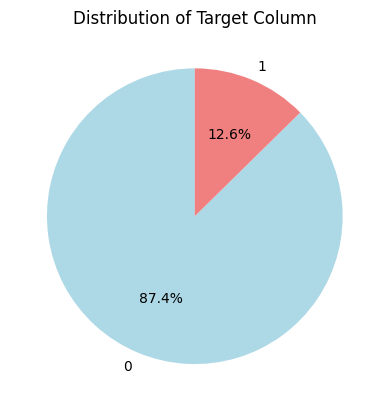

In [23]:
import matplotlib.pyplot as plt

# Count the occurrences of each category in the Target column
target_counts = df['Target'].value_counts()

# Create a pie chart
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])

# Add a title
plt.title("Distribution of Target Column")

# Show the plot
plt.show()


In [24]:
## If we want to check the distribution in text column then there is some different approaches
##To check the unique identites
df['Text'].nunique()


5169

In [25]:
## If we want to check the length of distribution of text
df['Text_length']=df['Text'].apply(len)
df['Text_length'].describe()



count    5169.000000
mean       78.977945
std        58.236293
min         2.000000
25%        36.000000
50%        60.000000
75%       117.000000
max       910.000000
Name: Text_length, dtype: float64

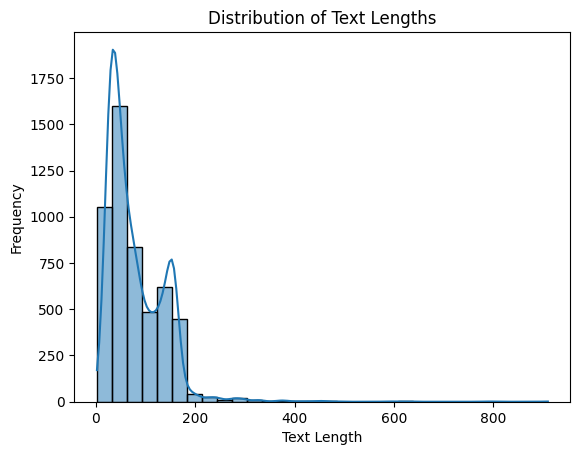

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Text_length'], bins=30, kde=True)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.show()


In [27]:
df[df['Text_length'] > 500]


,Target,Text,Text_length
1084,0,For me the love should start with attraction.i...,910
1578,0,How to Make a girl Happy? It's not at all diff...,611
1862,0,The last thing i ever wanted to do was hurt yo...,790
2157,0,Sad story of a Man - Last week was my b'day. M...,588
2433,0,Indians r poor but India is not a poor country...,632


In [28]:
## As we see the pie chart so the we say that data is imbalnced
## Now we go into deeper analysis we created more three columns
#1.count the number of characters
#2. count the number of words
#3. count the number of sentences

In [29]:
## Create a column which count the number of characetrs in each message
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\MEGA
[nltk_data]     COMPUTER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
## Find the number of character
df['num_characters']=df['Text'].apply(len)

In [31]:
df['num_characters']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 5169, dtype: int64

In [32]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\MEGA
[nltk_data]     COMPUTER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
nltk.download('punkt', download_dir='C:/nltk_data')  # For Windows

[nltk_data] Downloading package punkt to C:/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
import nltk.data
print(nltk.data.find('tokenizers/punkt'))


C:\Users\MEGA COMPUTER\AppData\Roaming\nltk_data\tokenizers\punkt


In [35]:
 ## Now create a column which calculate the number of words\
import nltk

df['word_count']=df['Text'].apply(lambda x: len(x.split()))

## lamda is an anonymus function which we call without creating def or it make concise
## In case of words we must use lambda and split to convert text into words





In [36]:
df['word_count']

0       20
1        6
2       28
3       11
4       13
        ..
5567    30
5568     8
5569    10
5570    26
5571     6
Name: word_count, Length: 5169, dtype: int64

In [37]:
!pip install spacy




[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 435.7 kB/s eta 0:00:30
     --------------------------------------- 0.0/12.8 MB 393.8 kB/s eta 0:00:33
     --------------------------------------- 0.1/12.8 MB 491.5 kB/s eta 0:00:26
      -------------------------------------- 0.2/12.8 MB 876.1 kB/s eta 0:00:15
      --------------------------------------- 0.3/12.8 MB 1.3 MB/s eta 0:00:10
     - -------------------------------------- 0.4/12.8 MB 1.6 MB/s eta 0:00:08
     - -------------------------------------- 0.6/12.8 MB 1.8 MB/s eta 0:00:07
     - -------------------------------------- 0.6/12.8 MB 1.8 MB/s eta 0:00:07
     -- ------------------------------------- 0.7/12.8 MB 1.8 MB/s eta 0:00:07
     -- ------------------------------------- 0.8/12.8 MB 1.8 MB/s eta 0:00:07
     -- ------------------------------------- 0.8/12.8 MB 1.6 MB/s eta 0:00:08
     -- ------------------------------------- 0.8/12.8 


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import spacy

# Load the English language model
nlp = spacy.load('en_core_web_sm')


In [40]:
# Apply sentence tokenization using spaCy
df['num_sentences'] = df['Text'].apply(lambda x: len(list(nlp(x).sents)))



In [41]:
df.head()

,Target,Text,Text_length,num_characters,word_count,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,111,20,3
1,0,Ok lar... Joking wif u oni...,29,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,155,28,2
3,0,U dun say so early hor... U c already then say...,49,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,61,13,1


In [42]:
## Now we remove the text_length column
df.drop(columns=['Text_length'],inplace=True)

In [43]:
df.head()

,Target,Text,num_characters,word_count,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [44]:
df[['num_characters','word_count','num_sentences']].describe()

,num_characters,word_count,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,2.100987
std,58.236293,11.068488,1.456628
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,3.000000
max,910.000000,171.000000,27.000000


In [45]:
## Now we apply separately describe function in ham 
df[df['Target']==0][['num_characters','word_count','num_sentences']].describe()

,num_characters,word_count,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,1.961913
std,56.358207,11.116240,1.400953
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,2.000000
75%,90.000000,18.000000,2.000000
max,910.000000,171.000000,27.000000


In [46]:
## Now we apply describe on spam
df[df['Target']==1][['num_characters','word_count','num_sentences']].describe()


,num_characters,word_count,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,3.062787
std,30.137753,5.967672,1.471835
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

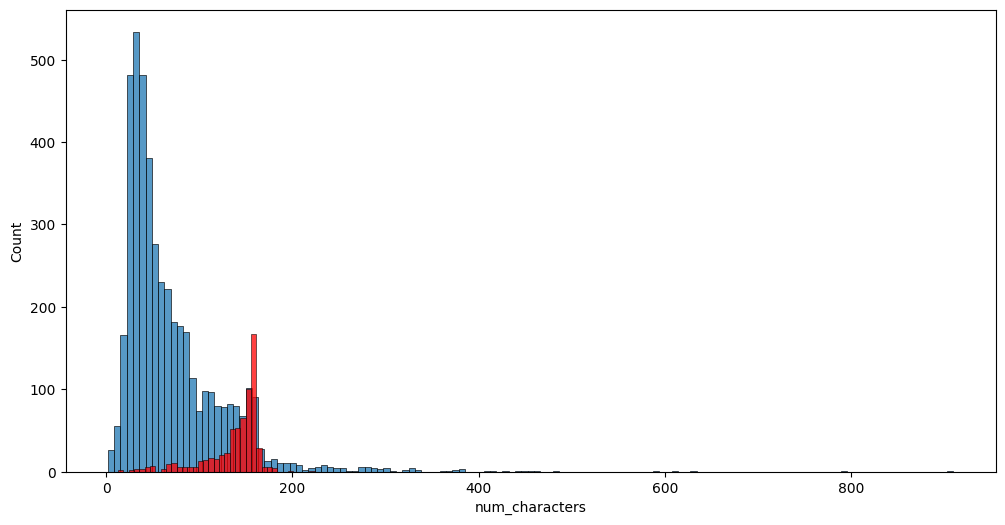

In [47]:
##Now we analyze both ham and spam graphicaly
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')



<Axes: xlabel='word_count', ylabel='Count'>

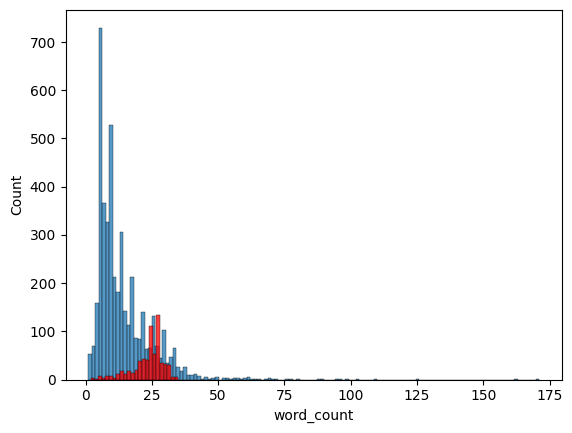

In [48]:
## Now we check on number of word
sns.histplot(df[df['Target']==0]['word_count'])
sns.histplot(df[df['Target']==1]['word_count'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

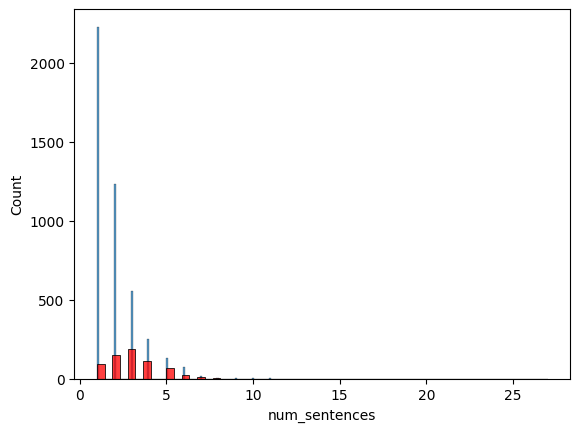

In [49]:
## Similary we also check on number of sentences
sns.histplot(df[df['Target']==0]['num_sentences'])
sns.histplot(df[df['Target']==1]['num_sentences'],color='red')

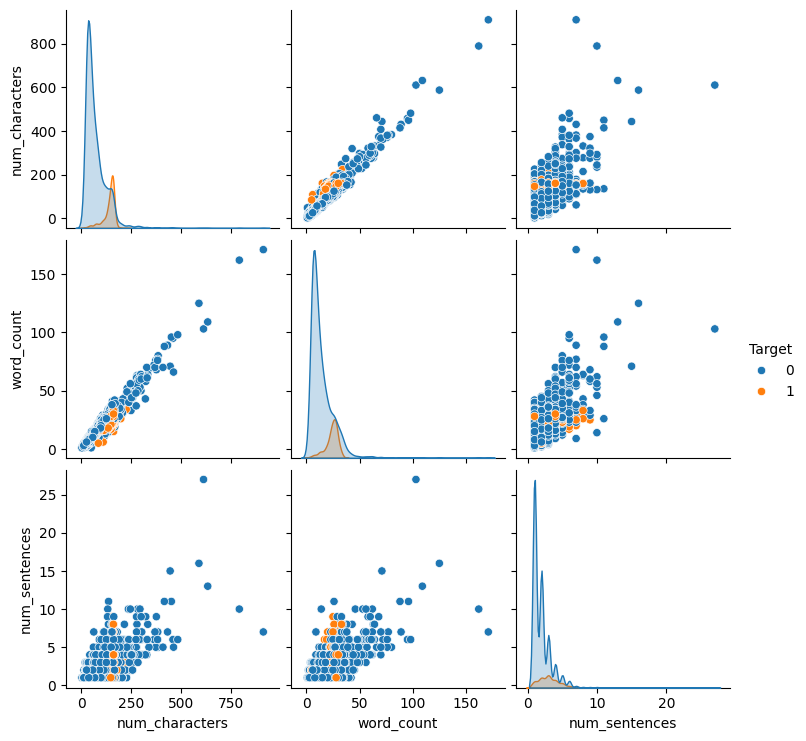

In [50]:
## Now we find the relationship between these columns
sns.pairplot(df,hue='Target')

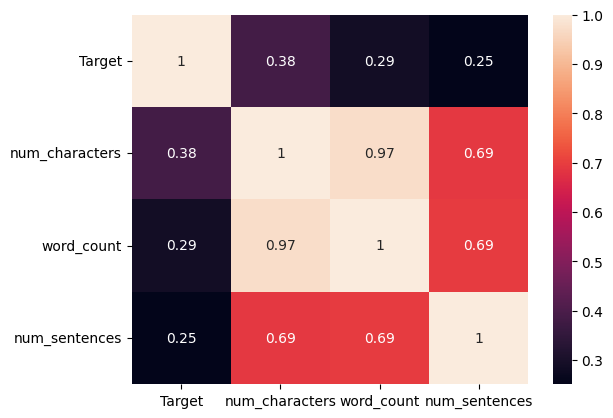

In [51]:
## Now we find the corelation then we create a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Create the heatmap for correlations of numeric columns
sns.heatmap(numeric_df.corr(), annot=True)

# Show the plot
plt.show()


## Step 3: Data or Text Preprocessing

1. **Lower Case**  
2. **Tokenization**  
3. **Removing Special Characters**  
4. **Removing Stop Words and Punctuations**  
5. **Stemming**  


In [52]:
## Our first step is to convert into lower case by creating a function
def transform_text(text):
    text=text.lower()
    return text

In [53]:
transform_text('Hello HarOON ')
transform_text("THIS IS MACHine LEArninG")

'this is machine learning'

In [54]:
## Second step is tokenization
def transform_text(text):
    text = text.lower()  # Convert to lowercase
    tokens = text.split()  # Split on spaces
    return tokens

print(transform_text('Hi, how are you?'))




['hi,', 'how', 'are', 'you?']


In [55]:
df['Text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [56]:
## Now we removing special characters
def transform_text(text):
    text = text.lower()  # Convert text to lowercase
    tokens = text.split()  # Split the text into tokens (words)
    y = []
    for token in tokens:
        if token.isalnum():  # Check if the token is alphanumeric
            y.append(token)
    
    return y  # Return the list after the loop



In [57]:
transform_text('Heloo HOW are % yoy *db')

['heloo', 'how', 'are', 'yoy']

In [58]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\MEGA
[nltk_data]     COMPUTER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
## Checking the stopwords
from nltk.corpus import stopwords
stopwords.words('english')


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [60]:
## To check Punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [61]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\MEGA
[nltk_data]     COMPUTER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [62]:
import nltk
from nltk.corpus import stopwords
import string

# Make sure to download stopwords and punkt
nltk.download('stopwords')
nltk.download('punkt')

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text
    tokens = text.split()
    
    # Get stopwords from NLTK
    stop_words = set(stopwords.words('english'))
    
    # Remove non-alphanumeric characters and stopwords
    y = []
    for token in tokens:
        if token.isalnum() and token not in stop_words and token not in string.punctuation:
            y.append(token)
    
    return y


[nltk_data] Downloading package stopwords to C:\Users\MEGA
[nltk_data]     COMPUTER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\MEGA
[nltk_data]     COMPUTER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [63]:
transform_text("Hello haroon DID You Like My Presentation")

['hello', 'haroon', 'like', 'presentation']

In [64]:
## Now we apply stemmer
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [65]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

# Make sure to download stopwords and punkt
nltk.download('stopwords')
nltk.download('punkt')

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text
    tokens = text.split()
    
    # Get stopwords from NLTK
    stop_words = set(stopwords.words('english'))
    
    # Initialize the stemmer
    ps = PorterStemmer()
    
    # Remove non-alphanumeric characters and stopwords
    filtered_tokens = []
    for token in tokens:
        if token.isalnum() and token not in stop_words and token not in string.punctuation:
            filtered_tokens.append(token)
    
    # Stem the filtered tokens
    stemmed_tokens = [ps.stem(word) for word in filtered_tokens]
    
    # Return the final text as a string
    return " ".join(stemmed_tokens)


[nltk_data] Downloading package stopwords to C:\Users\MEGA
[nltk_data]     COMPUTER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\MEGA
[nltk_data]     COMPUTER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [66]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong avail bugi n great world la e cine got amor'

In [67]:
df['Text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [68]:
## Now we apply this transformation on our main Text
df['Text'].apply(transform_text)

0       go jurong avail bugi n great world la e cine g...
1                                           ok joke wif u
2       free entri 2 wkli comp win fa cup final tkt 21...
3                             u dun say earli u c alreadi
4                        nah think goe live around though
                              ...                        
5567    2nd time tri 2 contact u pound 2 claim call 08...
5568                                     b go esplanad fr
5569                                                 mood
5570    guy bitch act like interest buy someth els nex...
5571                                            true name
Name: Text, Length: 5169, dtype: object

In [69]:
## Store in an other variable
df['transformed_text']=df['Text'].apply(transform_text)

In [70]:
df.head()

,Target,Text,num_characters,word_count,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go jurong avail bugi n great world la e cine g...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok joke wif u
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli u c alreadi
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goe live around though


In [71]:
## Finding the most common  and repeated words in spam  we use word clouds
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
from wordcloud import WordCloud



In [72]:
spam_wc=wc.generate(df[df['Target']==1][ 'transformed_text'].str.cat(sep=' '))


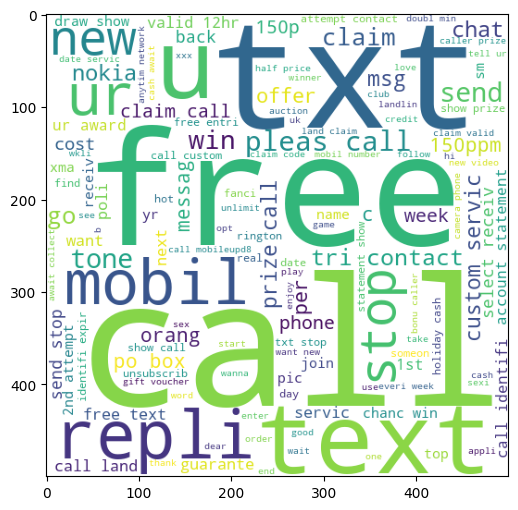

In [73]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [74]:
## Finding The most common words in ham
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [75]:
ham_wc1=wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep=' '))

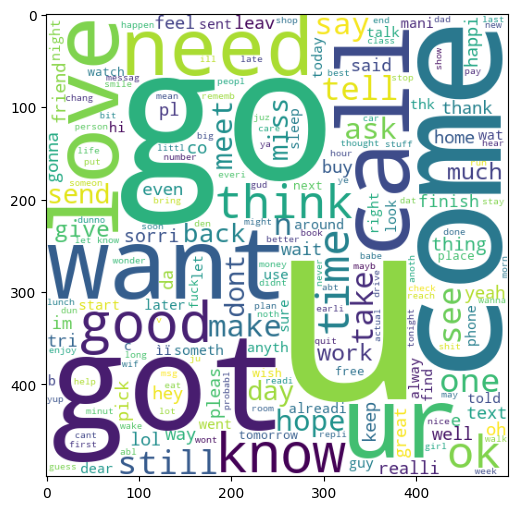

In [76]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc1)

In [77]:
## Now we finding the top most 30 words in spam
spam_corpus = []

# Iterate over messages classified as spam (Target == 1)
for msg in df[df['Target'] == 1]['transformed_text'].tolist():
    for word in msg.split():  # Split each message into words
        spam_corpus.append(word)




In [78]:
len(spam_corpus)

8176

In [79]:
## Now we calculate most 30 words in spam
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,310
1,free,157
2,2,151
3,txt,122
4,ur,119
5,text,112
6,mobil,103
7,repli,100
8,u,96
9,claim,91


C:\Users\MEGA COMPUTER\AppData\Local\Temp\ipykernel_9836\4196470246.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words['word'], y=top_words['count'], palette="viridis")


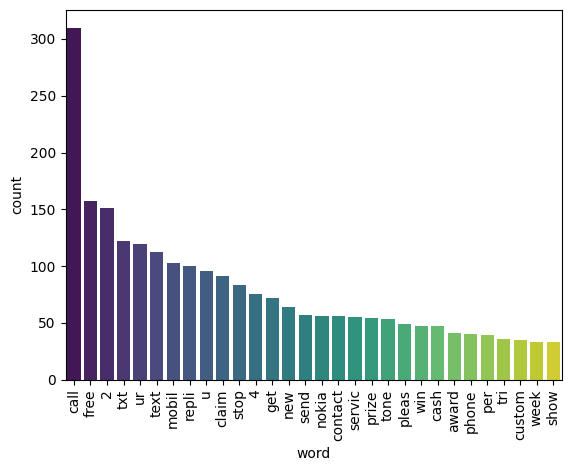

In [80]:
## Now we make a barplot of thses most common 30 word
import seaborn as sns
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Create a DataFrame from the top 30 most common words
top_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot using Seaborn
sns.barplot(x=top_words['word'], y=top_words['count'], palette="viridis")

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()


In [81]:
## Similarly we find most common 30 words in ham
ham_corpus = []  # Correct variable name

for msg in df[df['Target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)  # Corrected variable name


In [82]:
len(ham_corpus)

27382

In [83]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,794
1,go,379
2,get,339
3,2,272
4,come,251
5,like,225
6,got,221
7,call,214
8,know,208
9,want,198


C:\Users\MEGA COMPUTER\AppData\Local\Temp\ipykernel_9836\1379893141.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words['word'], y=top_words['count'], palette="viridis")


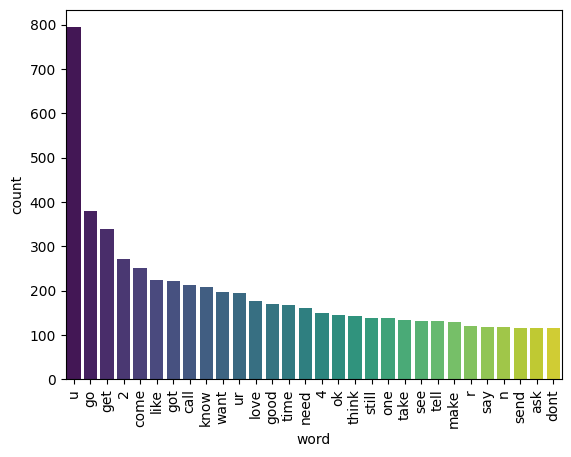

In [84]:
import seaborn as sns
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Create a DataFrame of the 30 most common words in ham messages
top_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Create the bar plot
sns.barplot(x=top_words['word'], y=top_words['count'], palette="viridis")

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()


## Step 4 : Model Building

## As we see our data is mostly imbalanced so naive bayes id good for us to use

In [85]:
##converting text data into numerical
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000,stop_words='english',ngram_range=(1,2))


In [158]:
## Now we fit this tfidf on our main data
## toarray(), function we used to convert sparse matrix to dense matrix
X=tfidf.fit_transform(df['transformed_text']).toarray()
print(f"Training data shape: {X.shape}")


Training data shape: (5169, 5643)


In [87]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [160]:
X.shape

(5169, 5643)

In [161]:
y=df['Target']
y.shape

(5169,)

In [162]:
## Now we apply train test split on models
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [163]:
## Now we apply naive bayes model
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [164]:
## Creating each object intialization
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [165]:
## Now we apply separately
gnb=GaussianNB()
gnb.fit(X_train,y_train)## you must search the difference between .fit() and .fit_transform()
y_pred1=gnb.predict(X_test)
print("Accuracy :", accuracy_score(y_test,y_pred1))
print("Confusion Matrix :",confusion_matrix(y_test,y_pred1))
print("Precision:",precision_score(y_test,y_pred1))


Accuracy : 0.7940038684719536
Confusion Matrix : [[707 189]
 [ 24 114]]
Precision: 0.37623762376237624


In [166]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred2))
print("Confusion Matrix:",confusion_matrix(y_test,y_pred2))
print("Precision:",precision_score(y_test,y_pred2))


Accuracy: 0.9516441005802708
Confusion Matrix: [[896   0]
 [ 50  88]]
Precision: 1.0


In [167]:
bnb=BernoulliNB()
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred3))
print("Confusion Matrix:",confusion_matrix(y_test,y_pred3))
print("Precision:",precision_score(y_test,y_pred3))

Accuracy: 0.9709864603481625
Confusion Matrix: [[892   4]
 [ 26 112]]
Precision: 0.9655172413793104


In [168]:
## We check the recall score of gnb,mnb,bnb

from sklearn.metrics import recall_score
def calculate_recall_score(y_test,y_pred1,y_pred2,y_pred3):
    recall_gnb=recall_score(y_test,y_pred1)
    recall_mnb=recall_score(y_test,y_pred2)
    recall_bnb=recall_score(y_test,y_pred3)
    print("GaussianNB:",recall_gnb)
    print("MultinomialNB:",recall_mnb)
    print("BernoulliNB:",recall_bnb)

In [169]:
## Now we call the function
calculate_recall_score(y_test,y_pred1,y_pred2,y_pred3)

GaussianNB: 0.8260869565217391
MultinomialNB: 0.6376811594202898
BernoulliNB: 0.8115942028985508


In [170]:
from sklearn.metrics import f1_score
f1score=f1_score(y_test,y_pred2)
f1score

0.7787610619469026

In [171]:
### First we check the classification report then we decide where to go
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       896
           1       1.00      0.64      0.78       138

    accuracy                           0.95      1034
   macro avg       0.97      0.82      0.88      1034
weighted avg       0.95      0.95      0.95      1034



In [172]:
import numpy as np
from sklearn.metrics import classification_report

# Get predicted probabilities
y_probs = mnb.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (spam)

# Set a new threshold (e.g., 0.3 instead of default 0.5)
threshold = 0.3
y_pred_new = np.where(y_probs >= threshold, 1, 0)

# Print new classification report
print(classification_report(y_test, y_pred_new))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       896
           1       0.93      0.78      0.85       138

    accuracy                           0.96      1034
   macro avg       0.95      0.88      0.91      1034
weighted avg       0.96      0.96      0.96      1034



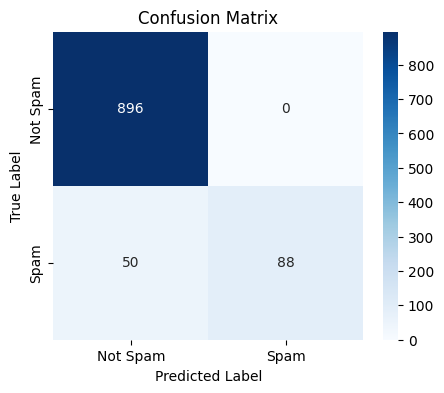

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred2)  # y_pred2 is your Naïve Bayes predictions

# Plot using seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [174]:
### Now we apply the hyperparameter tuning on mnb
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

param_grid={'alpha':[0.1,0.5,1.0,5.0,10.0]}
grid_search=GridSearchCV(MultinomialNB(),param_grid,cv=5,scoring='f1')
grid_search.fit(X_train,y_train)

print("Best Parameters:",grid_search.best_params_)
print("F1 Score:",grid_search.best_score_)

Best Parameters: {'alpha': 0.1}
F1 Score: 0.8692814234795934


In [175]:
## Now we use best parameters and we analyze more things
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

## Best Parameter
best_alpha=0.1
mnb_tuned=MultinomialNB(alpha=best_alpha)
mnb_tuned.fit(X_train,y_train)
y_pred_tuned=mnb_tuned.predict(X_test)

In [179]:
# Evaluate the model on training data
training_accuracy = mnb_tuned.score(X_train, y_train)
print(f"Training Accuracy: {training_accuracy:.4f}")


Training Accuracy: 0.9927


In [180]:
# Evaluate the model on test data
test_accuracy = mnb_tuned.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.9681


In [176]:
print(classification_report(y_test,y_pred_tuned))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       896
           1       0.90      0.86      0.88       138

    accuracy                           0.97      1034
   macro avg       0.94      0.92      0.93      1034
weighted avg       0.97      0.97      0.97      1034



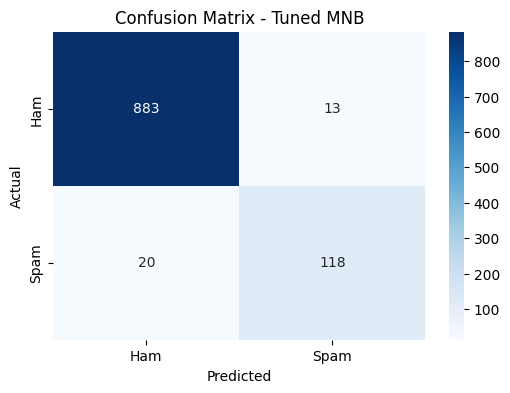

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_tuned)

# Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned MNB')
plt.show()


## Now we use Support Vector Classifier  to analyze the performance

In [178]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix
## Initializing with object
svc=SVC()

## Train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
## Fitting the model
svc.fit(X_train,y_train)
svc_pred=svc.predict(X_test)

## Now we find the accuracy precision and others to analyzing the performance of model
print("Accuracy:",accuracy_score(y_test,svc_pred))
print("Precision:",precision_score(y_test,svc_pred))
print("Confusion Matrix:",confusion_matrix(y_test,svc_pred))
print(" Recall Score:",recall_score(y_test,svc_pred))
print("F1 Score:",f1_score(y_test,svc_pred))

Accuracy: 0.9632495164410058
Precision: 0.9716981132075472
Confusion Matrix: [[893   3]
 [ 35 103]]
 Recall Score: 0.7463768115942029
F1 Score: 0.8442622950819673


In [107]:
from sklearn.svm import SVC  # ✅ Import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

# ✅ Initialize SVC
svc = SVC()  

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf'],  
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(svc, param_grid, cv=3, scoring=make_scorer(recall_score), verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# ✅ Get Best Parameters
print("Best Parameters:", grid_search.best_params_)

# ✅ Get Best Model
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'C': 10, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf'}


In [108]:
### NOw we Tune the model on the best parameter which is C is 10
best_C=10
svc_tuned=SVC(C=best_C)
svc_tuned.fit(X_train,y_train)
y_svc_tuned=svc_tuned.predict(X_test)

In [109]:
## Classification Report
print(classification_report(y_test,y_svc_tuned))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       0.97      0.81      0.89       138

    accuracy                           0.97      1034
   macro avg       0.97      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [110]:
print(confusion_matrix(y_test,y_svc_tuned))

[[893   3]
 [ 26 112]]


In [111]:
## NOw we check the performance of again model
from sklearn.metrics import classification_report,confusion_matrix
print("Confusion Matrix:",confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

Confusion Matrix: [[893   3]
 [ 27 111]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       0.97      0.80      0.88       138

    accuracy                           0.97      1034
   macro avg       0.97      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [112]:
## Now we try other model like DECISION Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score,confusion_matrix,f1_score
dtc=DecisionTreeClassifier()
## Apply Train test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
## Fitting the model
dtc.fit(X_train,y_train)
##Prediction
dtc_1=dtc.predict(X_test)


In [113]:
# Example input text message
sample_message = ["Congratulation you got a prize."]

# Apply the same vectorizer that was used during training
sample_input =tfidf.transform(sample_message)

# Predict using the trained Decision Tree model
prediction = dtc.predict(sample_input)

# Print the result
print("Predicted Class:", "Spam" if prediction[0] == 1 else "Ham")


Predicted Class: Spam


In [114]:
## Now we check the performance of decision tree classifier
print("Accuracy:",accuracy_score(y_test,dtc_1))
print("Precision:",precision_score(y_test,dtc_1))
print("Confusion Matrix:",confusion_matrix(y_test,dtc_1))
print("Recall Score:",recall_score(y_test,dtc_1))
print("F1 Score:",f1_score(y_test,dtc_1))

Accuracy: 0.9555125725338491
Precision: 0.859375
Confusion Matrix: [[878  18]
 [ 28 110]]
Recall Score: 0.7971014492753623
F1 Score: 0.8270676691729323


In [115]:
## First we get before hyperparameter tuning classification report
print(classification_report(y_test,dtc_1))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       896
           1       0.86      0.80      0.83       138

    accuracy                           0.96      1034
   macro avg       0.91      0.89      0.90      1034
weighted avg       0.95      0.96      0.95      1034



In [116]:
## As We see our recall score is low we try to improve it
## As we see our data is imbalanced so we make it balanced
dtc_1=DecisionTreeClassifier(class_weight='balanced',random_state=2)
dtc_1

DecisionTreeClassifier(class_weight='balanced', random_state=2)

In [117]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [118]:
## Now we apply SMOTE Function(Syntehtic Memory Oversamplng Techniques)
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', random_state=2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [119]:
## NOw we use Threshhold
y_probs=dtc.predict_proba(X_test)[:,1]
new_threshhold=0.3
y_pred_adjusted=(y_probs>new_threshhold).astype(int)

In [120]:
from sklearn.metrics import recall_score

# Predict labels
dtc_1 = dtc.predict(X_test)  # ✅ Get predicted values

# Compute recall score
recall = recall_score(y_test, dtc_1)
print("Recall Score:", recall)


Recall Score: 0.7971014492753623


In [121]:
##Now we apply hyperparameter tuning on DTC
from sklearn.model_selection import GridSearchCV
param_grid={
    'criterion' :['gini','entropy'],
    'max_depth':[3,5,10,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,5],
    'max_features':['sqrt','log2',None]
}
## perform grid search cv
grid_search=GridSearchCV(dtc,param_grid,cv=5,scoring='precision',n_jobs=-1)
grid_search.fit(X_train,y_train)
## Best Parameters
print("Best Parameters:",grid_search.best_params_)
best_model=grid_search.best_estimator_


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10}


In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test, best_model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.87      1.00      0.93       896
           1       0.70      0.05      0.09       138

    accuracy                           0.87      1034
   macro avg       0.79      0.52      0.51      1034
weighted avg       0.85      0.87      0.82      1034



In [123]:
## As we see Recall score is very low for spam detection so we try to improve it
## First we balance the dataset using smote function
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [124]:
## For imporving recall score we try to improve or some changes in hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15],  # Increase depth to allow more splits
    'min_samples_split': [2, 5, 10],  # Reduce split threshold for capturing minority class
    'min_samples_leaf': [1, 2, 5],  # Avoid single sample leaves
    'class_weight': ['balanced']  # Adjusts for class imbalance
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [125]:
from sklearn.metrics import classification_report, recall_score

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Generate classification report
print(classification_report(y_test, y_pred))

# Calculate and print the recall score
recall = recall_score(y_test, y_pred)
print(f"Recall Score: {recall:.4f}")


              precision    recall  f1-score   support

           0       0.96      0.97      0.97       896
           1       0.79      0.77      0.78       138

    accuracy                           0.94      1034
   macro avg       0.87      0.87      0.87      1034
weighted avg       0.94      0.94      0.94      1034

Recall Score: 0.7681


In [126]:
## Now we apply another model which is random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix,recall_score,f1_score
## Initialize the model
rf=RandomForestClassifier()
## Apply train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
## Fitting the model
rf.fit(X_train,y_train)
## Predict 
rf1=rf.predict(X_test)
## Checking the performance 
print("Accuracy:",accuracy_score(y_test,rf1))
print("Precision:",precision_score(y_test,rf1))
print("Confuaion Matrix:",confusion_matrix(y_test,rf1))
print("Recall Score:",recall_score(y_test,rf1))
print("F1 Score:",f1_score(y_test,rf1))

Accuracy: 0.9729206963249516
Precision: 0.9741379310344828
Confuaion Matrix: [[893   3]
 [ 25 113]]
Recall Score: 0.8188405797101449
F1 Score: 0.889763779527559


### Now We Compare All the Models Using Cross Validation

In [127]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Define the model
models={
    "Naive Bayes (Guassian Nb)":GaussianNB(),
    "Multinomial Naive Bayes":MultinomialNB(),
    "Support Vector Classifier":SVC(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Random Forest Classifier":RandomForestClassifier()
}


## NOw we performing the Cross validation
cv_results={}

for name, model in models.items():
    scores=cross_val_score(model,X_train,y_train,cv=5,scoring='recall')
    cv_results[name]=scores
print(f"{name}: Mean Recall = {scores.mean():.4f}, Scores = {scores}")

# Find the best model
best_model = max(cv_results, key=lambda k: cv_results[k].mean())
print(f"\n🔹 Best Model based on Recall: {best_model} with Recall Score = {cv_results[best_model].mean():.4f}")

Random Forest Classifier: Mean Recall = 0.7398, Scores = [0.70873786 0.7184466  0.80582524 0.7961165  0.66990291]

🔹 Best Model based on Recall: Naive Bayes (Guassian Nb) with Recall Score = 0.8602


## NOw we Finilaize the model

In [128]:
final_model = GaussianNB()
final_model.fit(X_train, y_train)  


GaussianNB()

In [129]:
from sklearn.metrics import classification_report

y_pred = final_model.predict(X_test)  
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.79      0.87       896
           1       0.39      0.86      0.53       138

    accuracy                           0.80      1034
   macro avg       0.68      0.82      0.70      1034
weighted avg       0.89      0.80      0.83      1034



In [130]:
final_model = GaussianNB(var_smoothing=1e-9)  # Experiment with different values


In [131]:
from sklearn.naive_bayes import GaussianNB

# Define the model
final_model = GaussianNB()

# Train the model
final_model.fit(X_train, y_train)  # Ensure X_train is in array format

# Now make predictions
y_pred = final_model.predict(X_test)  # Convert X_test if needed

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.79      0.87       896
           1       0.39      0.86      0.53       138

    accuracy                           0.80      1034
   macro avg       0.68      0.82      0.70      1034
weighted avg       0.89      0.80      0.83      1034



In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Define parameter grid
param_grid = {'alpha': [ 1.0]}


# Initialize model
nb = MultinomialNB()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='precision')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Alpha:", grid_search.best_params_)

# Get the best model
best_nb = grid_search.best_estimator_

# Make predictions
y_pred = best_nb.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Best Alpha: {'alpha': 1.0}
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       1.00      0.77      0.87       138

    accuracy                           0.97      1034
   macro avg       0.98      0.88      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [133]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample dataset (replace this with your actual dataset)
sample_texts = [
    "You won a lottery! Click here to claim",  # Spam
    "Hello, how are you doing?",  # Ham
    "Earn money fast by clicking this link",  # Spam
    "Let's meet for lunch tomorrow."  # Ham
]

# Initialize and train the vectorizer
tfidf = TfidfVectorizer()
tfidf.fit(sample_texts)

# Save vectorizer
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

print("✅ TF-IDF Vectorizer saved successfully!")


✅ TF-IDF Vectorizer saved successfully!


In [134]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Sample labels (1 = Spam, 0 = Ham)
labels = [1, 0, 1, 0]

# Transform texts using TF-IDF
X = tfidf.transform(sample_texts)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Train Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Save model
with open("spam_classifier.pkl", "wb") as f:
    pickle.dump(nb_model, f)

print("✅ Spam classifier model saved successfully!")


✅ Spam classifier model saved successfully!


In [135]:
import pickle

# Load TF-IDF Vectorizer
with open("vectorizer.pkl", "rb") as f:
    tfidf = pickle.load(f)

# Load Trained Spam Classifier Model
with open("spam_classifier.pkl", "rb") as f:
    spam_model = pickle.load(f)

print("✅ Model and Vectorizer loaded successfully!")


✅ Model and Vectorizer loaded successfully!


In [136]:
def predict_message(text, vectorizer, model):
    # Transform input text using TF-IDF vectorizer
    text_vector = vectorizer.transform([text])
    
    # Make prediction using the trained model
    prediction = model.predict(text_vector)[0]
    
    # Return the prediction result
    return "SPAM" if prediction == 1 else "HAM"


In [137]:
# Check if vectorizer and model are loaded
print(type(tfidf))  # Should be <class 'sklearn.feature_extraction.text.TfidfVectorizer'>
print(type(spam_model))  # Should be <class 'sklearn.naive_bayes.MultinomialNB'> or your trained model


<class 'sklearn.feature_extraction.text.TfidfVectorizer'>
<class 'sklearn.naive_bayes.MultinomialNB'>


In [138]:
import time

user_text = input("Enter a message to check: ")

start_time = time.time()
text_vector = tfidf.transform([user_text])  # Transform only
end_time = time.time()

print("Vectorization Time:", end_time - start_time, "seconds")


Vectorization Time: 0.0009951591491699219 seconds


In [139]:
# Get user input
user_text = input(" This book is good: ")

# Predict using the trained model
result = predict_message(user_text, tfidf, spam_model)

# Print the result
print("Prediction:", result)


Prediction: SPAM


In [140]:
import numpy as np

# Assuming 'y_train' contains spam (1) and ham (0) labels
print("Spam Count:", np.sum(y_train == 1))
print("Ham Count:", np.sum(y_train == 0))


Spam Count: 0
Ham Count: 0


In [141]:
import numpy as np

y_train = np.array(y_train)

print("y_train shape:", y_train.shape)
print("First few labels:", y_train[:5])


y_train shape: (3,)
First few labels: [0 1 1]


In [142]:
print("Is y_train empty?", len(y_train) == 0)


Is y_train empty? False


In [143]:
import numpy as np

print("Unique values in y_train:", np.unique(y_train))


Unique values in y_train: [0 1]


In [144]:
y_train = np.array([1 if label == 'spam' else 0 for label in y_train])


In [145]:
print("Spam Count:", np.sum(y_train == 1))
print("Ham Count:", np.sum(y_train == 0))


Spam Count: 0
Ham Count: 3


In [146]:
print(y_train.dtype)


int64


In [147]:
y_train = y_train.astype(int)


In [148]:
print("Unique values in y before splitting:", np.unique(y))
print("Length of y:", len(y))


Unique values in y before splitting: [0 1]
Length of y: 5169


In [149]:
from sklearn.model_selection import train_test_split

# Re-splitting with stratification to maintain balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Checking the distribution in train and test sets
print("y_train:", np.unique(y_train, return_counts=True))
print("y_test:", np.unique(y_test, return_counts=True))


ValueError: Found input variables with inconsistent numbers of samples: [4, 5169]

In [ ]:
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (4, 23)
y shape: (5169,)


In [ ]:
if hasattr(X, "toarray"):  # Check if X is a sparse matrix
    X = X.toarray()

print("New X shape:", X.shape)


New X shape: (4, 23)


In [ ]:
print("Available variables:", dir())  # List all defined variables


Available variables: ['BernoulliNB', 'Counter', 'DecisionTreeClassifier', 'GaussianNB', 'GridSearchCV', 'In', 'LabelEncoder', 'MultinomialNB', 'Out', 'PorterStemmer', 'RandomForestClassifier', 'SMOTE', 'SVC', 'TfidfVectorizer', 'WordCloud', 'X', 'X_test', 'X_train', 'X_train_resampled', 'X_train_tfidf', '_', '_10', '_11', '_117', '_129', '_13', '_133', '_134', '_146', '_16', '_17', '_18', '_19', '_21', '_22', '_23', '_25', '_26', '_28', '_30', '_32', '_33', '_34', '_37', '_42', '_44', '_45', '_46', '_47', '_48', '_49', '_5', '_50', '_51', '_54', '_56', '_58', '_59', '_6', '_60', '_61', '_62', '_64', '_65', '_67', '_68', '_69', '_7', '_71', '_74', '_77', '_79', '_80', '_83', '_84', '_88', '_89', '_90', '_99', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '__vsc_ipynb_file__', '_dh', '_exit_code', '_i', '_i1', '_i10', '_i100', '_i101', '_i102', '_i103', '_i104', '_i105', '_i106', '_i107', '_i108', '_i109', '_i11', '_i110', '_i

In [ ]:
print(type(df))  # If df is a DataFrame, check its columns
print(df.head())  # Look at the first few rows


<class 'pandas.core.frame.DataFrame'>
   Target                                               Text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   word_count  num_sentences  \
0          20              3   
1           6              2   
2          28              2   
3          11              2   
4          13              1   

                                    transformed_text  
0  go jurong avail bugi n great world la e cine g...  
1                                      ok joke wif u  
2  free entri 2 wkli comp win fa cup final tkt 21...  
3                        u dun say earli u c alreadi  
4            

In [ ]:
print("Type of raw text data:", type(df["Text"]))  # Should be a Pandas Series
print("Length of raw text data:", len(df["Text"]))  # Should be 5169
print(df["Text"].head())  # Show first 5 messages


Type of raw text data: <class 'pandas.core.series.Series'>
Length of raw text data: 5169
0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Text, dtype: object


In [ ]:
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df["Text"])

print("Type of X_tfidf:", type(X_tfidf))  # Should be a sparse matrix
print("Shape of X_tfidf:", X_tfidf.shape)  # Should match (5169, num_features)


Type of X_tfidf: <class 'scipy.sparse._csr.csr_matrix'>
Shape of X_tfidf: (5169, 8672)


In [ ]:
print(df["Target"].value_counts())


Target
0    4516
1     653
Name: count, dtype: int64


In [150]:
import numpy as np

print("Unique values in y_train:", np.unique(y_train))
print("Counts of each class in y_train:\n", np.bincount(y_train))


Unique values in y_train: [0]
Counts of each class in y_train:
 [3]


In [ ]:
print(df["Target"].value_counts())
print("y_train distribution:\n", np.bincount(y_train))
print("y_test distribution:\n", np.bincount(y_test))


Target
0    4516
1     653
Name: count, dtype: int64
y_train distribution:
 [3]
y_test distribution:
 [1]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, df["Target"], test_size=0.2, random_state=42, stratify=df["Target"]
)

# Check new class distribution
print("y_train distribution:\n", np.bincount(y_train))
print("y_test distribution:\n", np.bincount(y_test))


y_train distribution:
 [3613  522]
y_test distribution:
 [903 131]


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("New y_train distribution:\n", np.bincount(y_train_resampled))


New y_train distribution:
 [3613 3613]


In [ ]:
# Train the model again
spam_model.fit(X_train_resampled, y_train_resampled)

# Evaluate on test set (no resampling on test data!)
y_pred = spam_model.predict(X_test)

# Check classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       903
           1       0.90      0.93      0.91       131

    accuracy                           0.98      1034
   macro avg       0.94      0.96      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [ ]:
print("Shape of Training Data:", X_tfidf.shape)  
print("Shape of Test Data (Example):", tfidf.transform(["test message"]).shape)  


Shape of Training Data: (5169, 8672)
Shape of Test Data (Example): (1, 23)


In [ ]:
# Refit TF-IDF on the entire dataset (if not already done)
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df["Text"])  # Fit on full dataset

# Now transform the new test message correctly
test_message = ["This book is good"]
X_test_tfidf = tfidf.transform(test_message)  # Should match the 8672 features

print("Shape of New Test Data:", X_test_tfidf.shape)


Shape of New Test Data: (1, 8672)


In [ ]:
# Predict using the trained model
result = spam_model.predict(X_test_tfidf)

# Print the prediction result
print("Prediction:", "Spam" if result[0] == 1 else "Not Spam")


Prediction: Not Spam


In [ ]:
# Sample messages
test_messages = [
    "Congratulations! You've won a $1000 gift card. Click here to claim now!",  # Likely spam
    "Hey, are we still meeting for lunch tomorrow?",  # Not spam
    "Limited-time offer! Buy one, get one free on all items. Shop now!",  # Likely spam
    "Can you send me the report by EOD?",  # Not spam
]

# Transform test messages using TF-IDF
test_messages_tfidf = tfidf.transform(test_messages)

# Predict using the trained model
predictions = spam_model.predict(test_messages_tfidf)

# Print the results
for msg, pred in zip(test_messages, predictions):
    print(f"Message: {msg}\nPrediction: {'Spam' if pred == 1 else 'Not Spam'}\n")


Message: Congratulations! You've won a $1000 gift card. Click here to claim now!
Prediction: Spam

Message: Hey, are we still meeting for lunch tomorrow?
Prediction: Not Spam

Message: Limited-time offer! Buy one, get one free on all items. Shop now!
Prediction: Spam

Message: Can you send me the report by EOD?
Prediction: Not Spam



In [156]:
# Sample messages
test_messages = [
   "This is a good book"
   "Plz click the link to win the prize"
]

# Transform test messages using TF-IDF
test_messages_tfidf = tfidf.transform(test_messages)

# Predict using the trained model
predictions = spam_model.predict(test_messages_tfidf)

# Print the results
for msg, pred in zip(test_messages, predictions):
    print(f"Message: {msg}\nPrediction: {'Spam' if pred == 1 else 'Not Spam'}\n")


Message: This is a good bookPlz click the link to win the prize
Prediction: Spam



In [ ]:
import joblib

# Save the trained model
joblib.dump(spam_model, "spam_classifier.pkl")

# Save the TF-IDF vectorizer
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!


In [152]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib

print('pandas', pd.__version__)
print('numpy', np.__version__)
print('sklearn', sklearn.__version__)
print('Matplotlib', matplotlib.__version__)


pandas 2.2.2
numpy 2.0.1
sklearn 1.6.0
Matplotlib 3.9.1


In [153]:
import joblib

# Save the trained spam model (Multinomial Naive Bayes or any other model you're using)
joblib.dump(spam_model, "spam_classifier.pkl")

# Save the TF-IDF vectorizer used during training
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!


In [181]:
import pickle

# Save the model
with open("spam_classifier.pkl", "wb") as model_file:
    pickle.dump(mnb_tuned, model_file)

# Save the TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!


In [182]:
import pickle

# Assuming your vectorizer is named 'tfidf'
with open("tfidf_vectorizer.pkl", "wb") as file:
    pickle.dump(tfidf, file)


In [183]:
with open("spam_classifier.pkl", "wb") as file:
    pickle.dump(spam_model, file)
